In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#läser in parquet-filen
wine=pd.read_parquet('wine_parquet')

In [3]:
wine['country']=wine['country'].astype('category')
wine['description']=wine['description'].astype('string')
wine['variety']=wine['variety'].astype('category')
wine['winery']=wine['winery'].astype('category')

In [4]:
#tar bort de kolumner som vi inte är intresserade av i den här analysen
wine=wine.drop(columns=['region_1', 'region_2', 'designation','province'])
#tar bort de rader som saknar land
wine=wine.dropna(subset=['country'])
#tar bort dubeltter
wine=wine.drop_duplicates(keep='first')

In [5]:
#Data cleaning. Kolumnen Price och de med NaN värden plockas bort för prisjämförelserna.
wine=wine.dropna(subset=['price'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89125 entries, 0 to 149639
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      89125 non-null  category
 1   description  89125 non-null  string  
 2   points       89125 non-null  int64   
 3   price        89125 non-null  float64 
 4   variety      89125 non-null  category
 5   winery       89125 non-null  category
dtypes: category(3), float64(1), int64(1), string(1)
memory usage: 3.8 MB


In [5]:
#vilka winerys som producerar viner med högsta betyg.
highest_rated_winerys=wine[wine['points']==100]
highest_rated_winerys['winery'].unique()
highest_rated_winerys['winery'].head(11)

2145               Château Haut-Brion
19354                          Cayuse
19355     Chambers Rosewood Vineyards
24151           Tenuta dell'Ornellaia
26296                            Krug
28954              Giovanni Chiappini
89399                       Cardinale
92916                          Shafer
98647                 Williams Selyem
111087                     Avignonesi
114272                          Sloan
Name: winery, dtype: object

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49526/3032740134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avignonesi['variety'] = avignonesi['variety'].cat.remove_unused_categories()


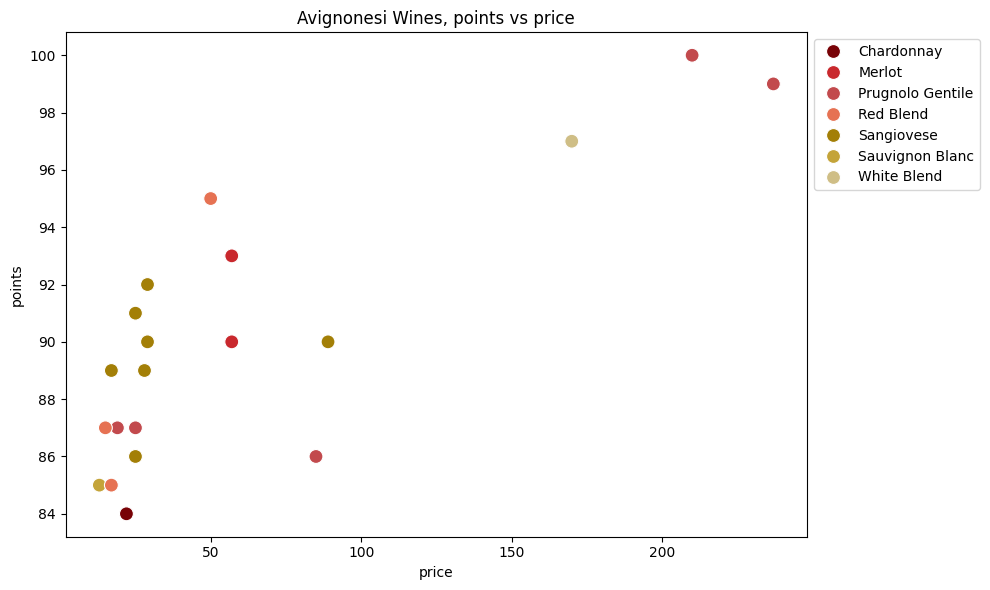

In [7]:
#Avignonesi Winery
avignonesi= wine[wine['winery']=='Avignonesi']
avignonesi['variety'] = avignonesi['variety'].cat.remove_unused_categories()
colors=['#780206', '#c9282d', '#c24a4d', '#e67253', '#a37f07', '#c4a439', '#cfbe86']

plt.figure(figsize=(10,6))
sns.scatterplot(x=avignonesi['price'], y=avignonesi['points'], hue=avignonesi['variety'], marker='o', s=100, palette=colors)
plt.title('Avignonesi Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Avignonesi.png', bbox_inches=None)

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49526/977992512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardinale['variety'] = cardinale['variety'].cat.remove_unused_categories()


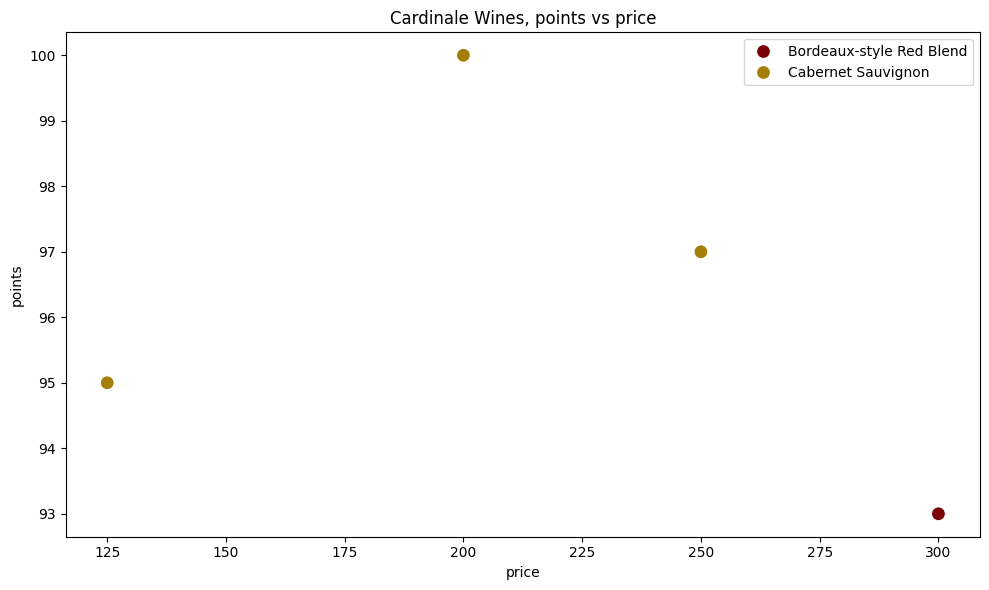

In [8]:
#Cardinale Winery
cardinale= wine[wine['winery']=='Cardinale']
cardinale['variety'] = cardinale['variety'].cat.remove_unused_categories()
colors=['#780206', '#a37f07']
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= cardinale, marker='o', s=100, palette=colors)
plt.title('Cardinale Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Cardinale.png', bbox_inches=None)

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49526/2926220576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cayuse['variety'] = cayuse['variety'].cat.remove_unused_categories()


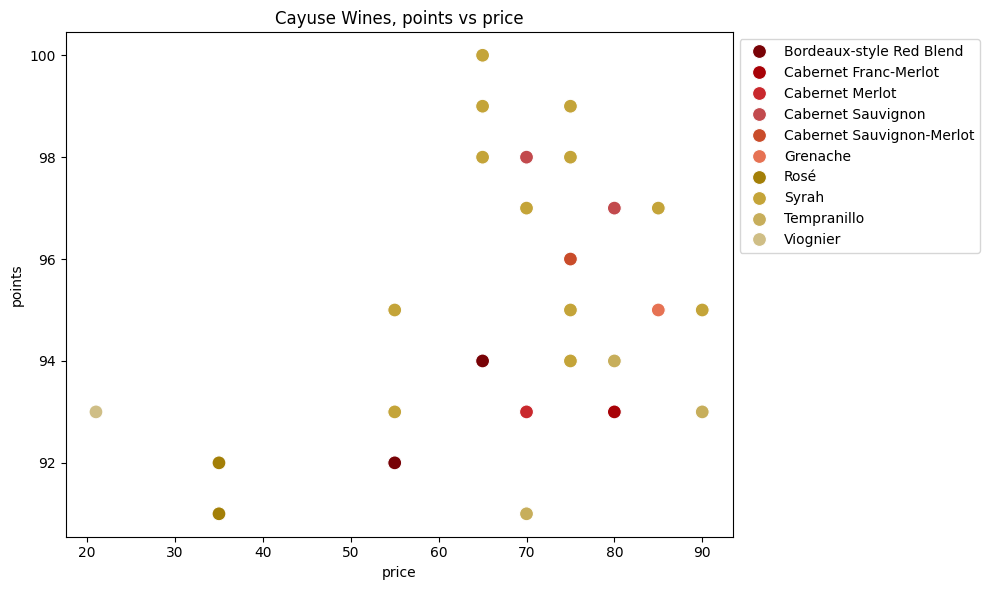

In [9]:
#Cayuse Winery
cayuse= wine[wine['winery']=='Cayuse']
cayuse['variety'] = cayuse['variety'].cat.remove_unused_categories()
colors=['#780206', '#a80207', '#c9282d', '#c24a4d', '#c94c2a', '#e67253', '#a37f07', '#c4a439', '#c7ae5b', '#cfbe86']

plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= cayuse, marker='o', s=100, palette=colors)
plt.title('Cayuse Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Cayuse.png', bbox_inches=None)

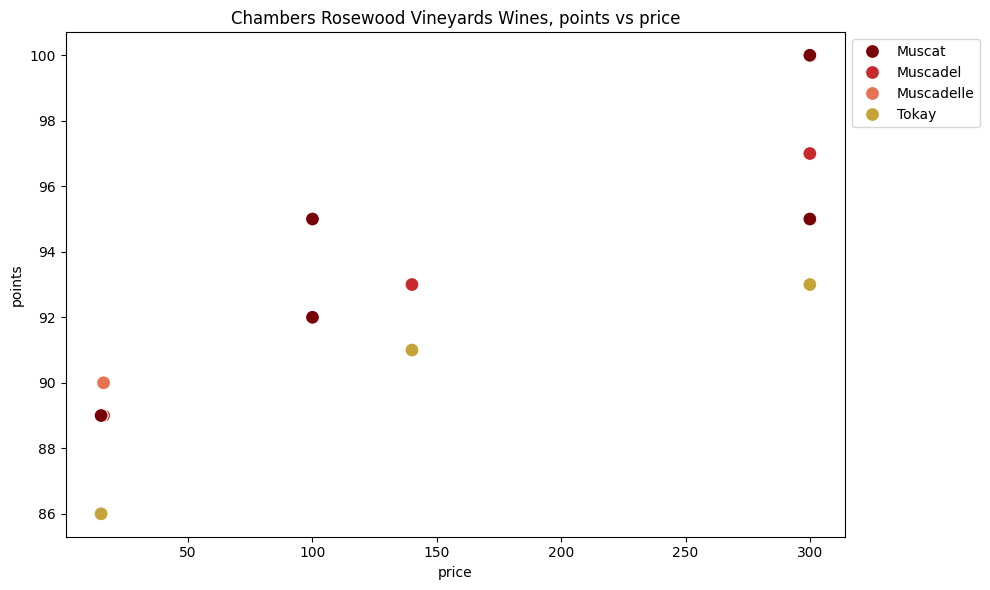

In [28]:
#Chambers Rosewood Vineyards
chambers= wine[wine['winery']=='Chambers Rosewood Vineyards']
chambers['variety'] = chambers['variety'].cat.remove_unused_categories()
colors=['#780206', '#c9282d', '#e67253','#c4a439']

plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= chambers, marker='o', s=100, palette=colors)
plt.title('Chambers Rosewood Vineyards Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Chambers.png', bbox_inches=None)

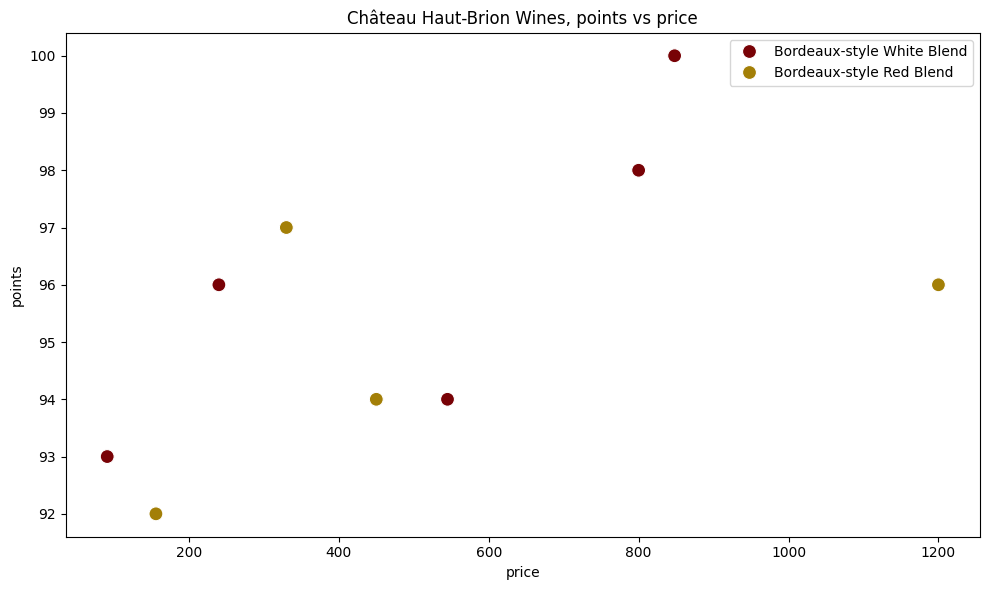

In [29]:
#Château Haut-Brion
chateau= wine[wine['winery']=='Château Haut-Brion']
chateau['variety'] = chateau['variety'].cat.remove_unused_categories()
colors=['#780206', '#a37f07']
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= chateau, marker='o', s=100, palette=colors)
plt.title('Château Haut-Brion Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('CChâteau Haut-Brion.png', bbox_inches=None)

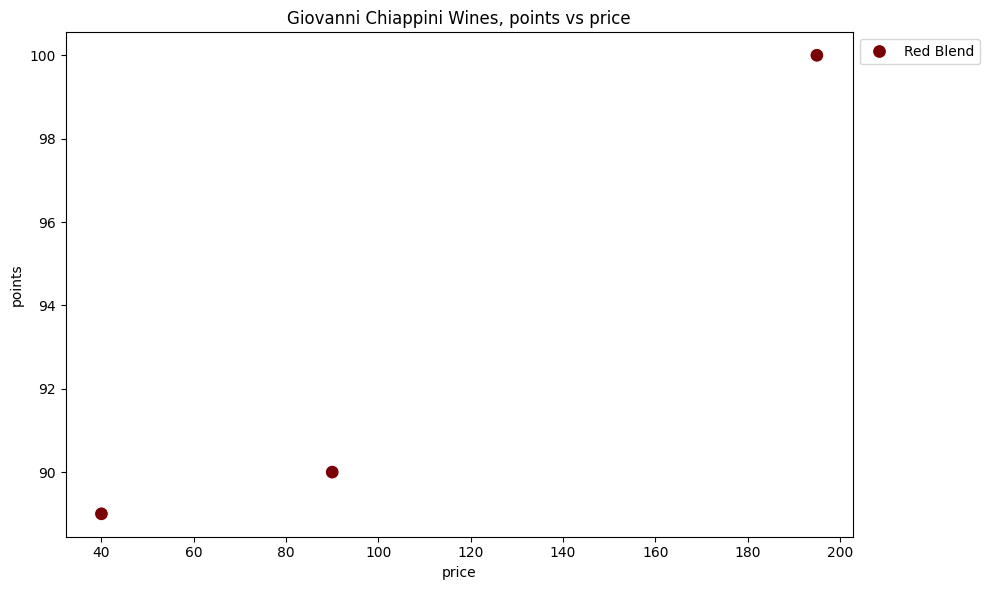

In [30]:
#Giovanni Chiappini
giovanni= wine[wine['winery']=='Giovanni Chiappini']
giovanni['variety'] = giovanni['variety'].cat.remove_unused_categories()
colors=['#780206']
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= giovanni, marker='o', s=100, palette=colors)
plt.title('Giovanni Chiappini Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Giovanni Chiappini.png', bbox_inches=None)

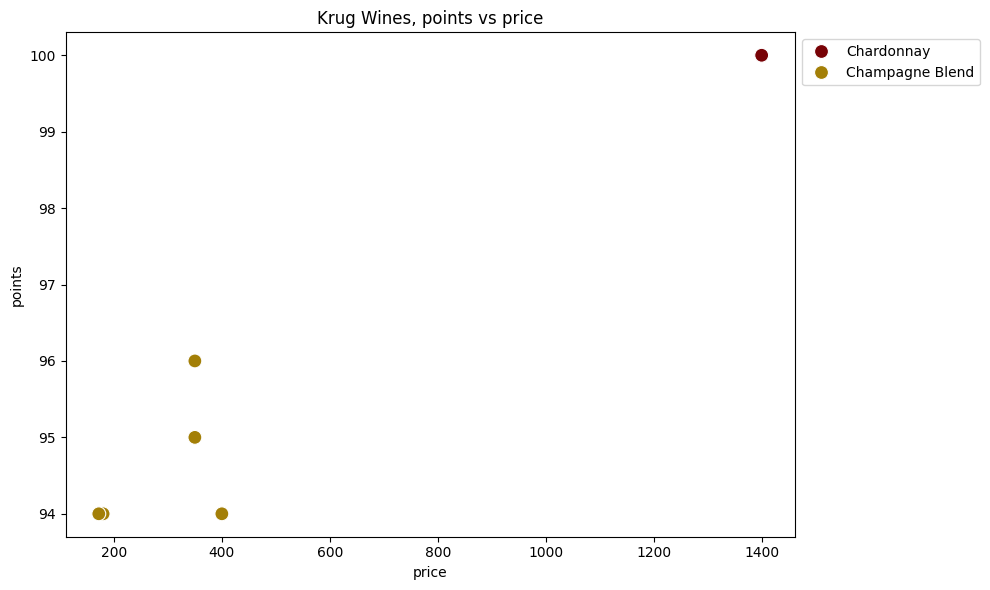

In [31]:
#Krug
krug= wine[wine['winery']=='Krug']
krug['variety'] = krug['variety'].cat.remove_unused_categories()
colors=['#780206', '#a37f07']
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= krug, marker='o', s=100, palette=colors)
plt.title('Krug Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Krug.png', bbox_inches=None)

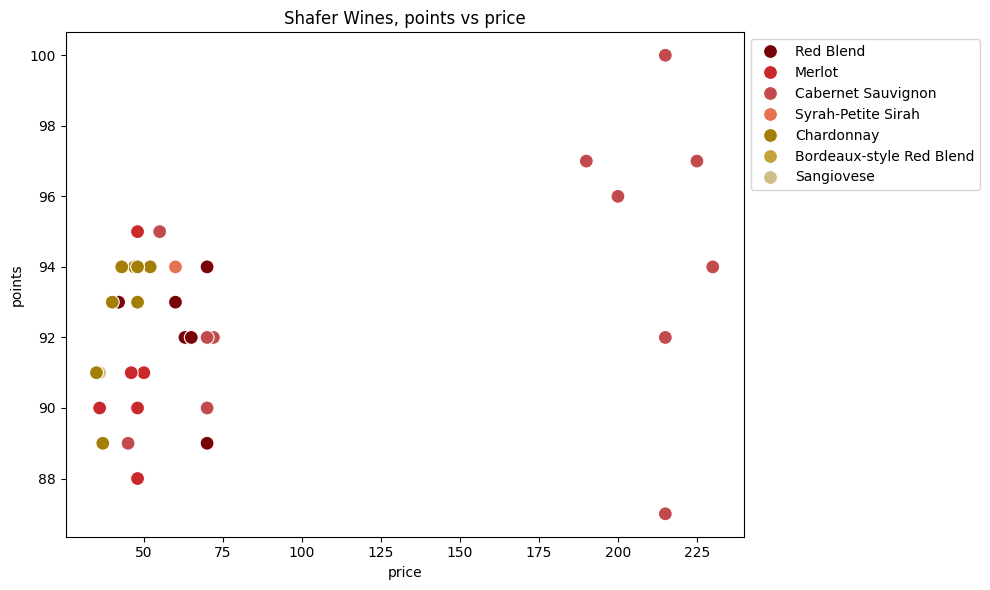

In [32]:
#Shafer
shafer= wine[wine['winery']=='Shafer']
shafer['variety'] = shafer['variety'].cat.remove_unused_categories()
colors=['#780206', '#c9282d', '#c24a4d', '#e67253', '#a37f07', '#c4a439', '#cfbe86']
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= shafer, marker='o', s=100, palette=colors)
plt.title('Shafer Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Shafer.png', bbox_inches=None)

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49526/2466724905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sloan['variety'] = sloan['variety'].cat.remove_unused_categories()


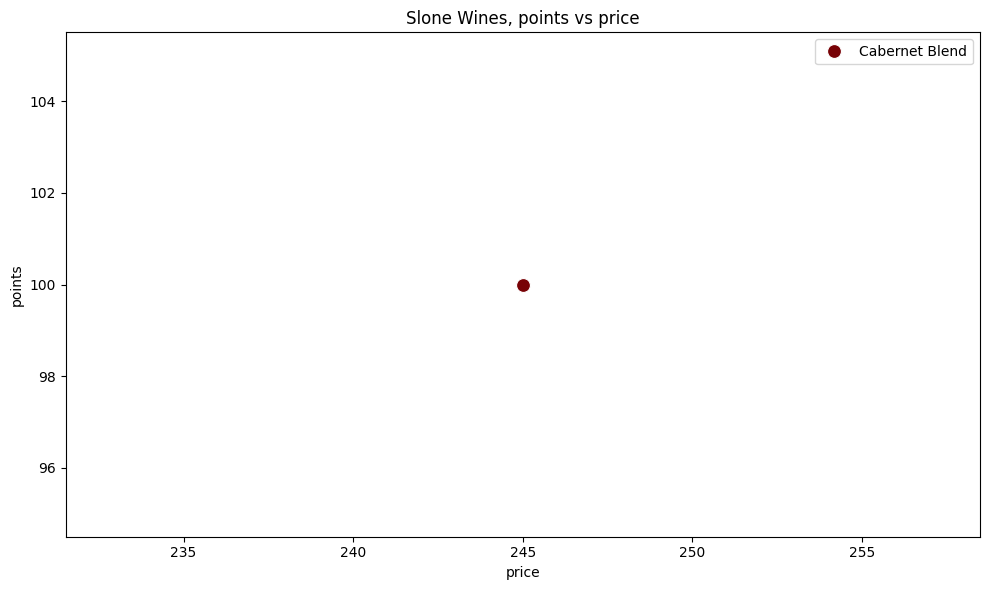

In [12]:
#Sloan
sloan= wine[wine['winery']=='Sloan']
sloan['variety'] = sloan['variety'].cat.remove_unused_categories()
colors=['#780206']
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= sloan, marker='o', s=100, palette=colors)
plt.title('Slone Wines, points vs price')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('Slone.png', bbox_inches=None)

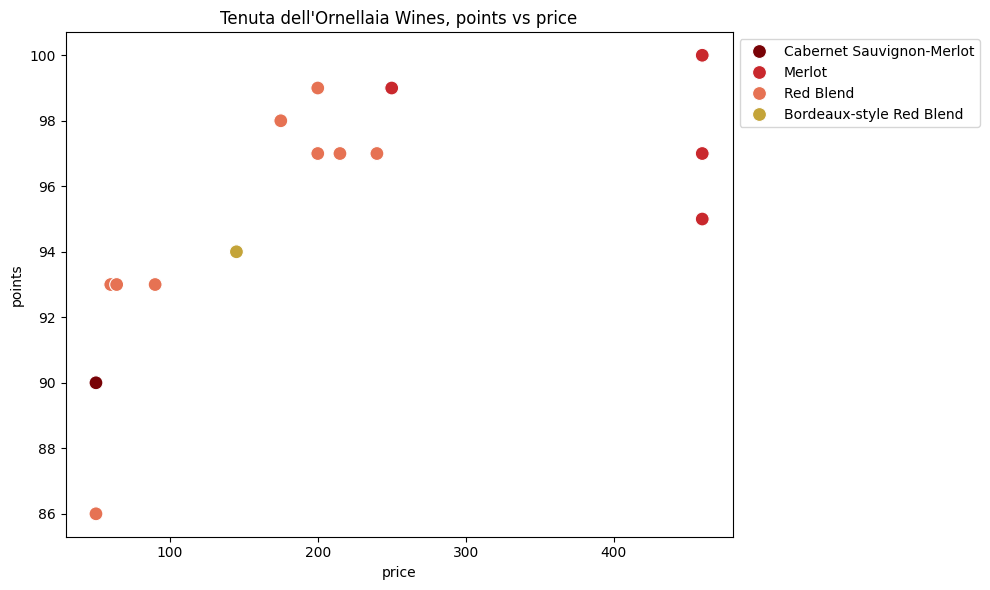

In [34]:
#Tenuta dell'Ornellaia
tenuta= wine[wine["winery"]=="Tenuta dell'Ornellaia"]
tenuta['variety'] = tenuta['variety'].cat.remove_unused_categories()
colors=['#780206', '#c9282d', '#e67253','#c4a439']
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= tenuta, marker='o', s=100, palette=colors)
plt.title("Tenuta dell'Ornellaia Wines, points vs price")
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig("Tenuta dell'Ornellaia.png", bbox_inches=None)

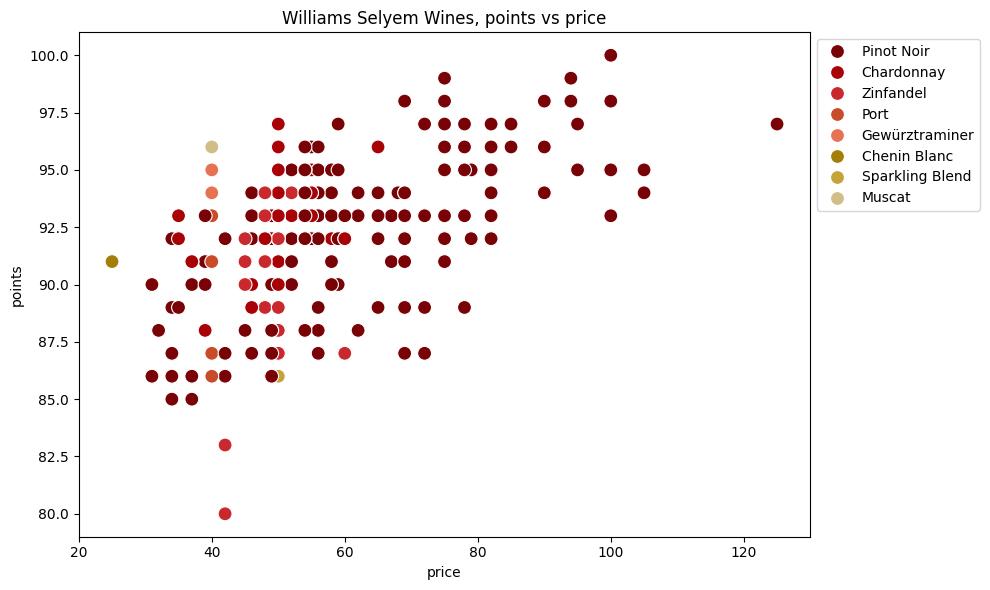

In [35]:
#Williams Selyem
william= wine[wine["winery"]=="Williams Selyem"]
william['variety'] = william['variety'].cat.remove_unused_categories()
colors=['#780206', '#a80207', '#c9282d', '#c94c2a', '#e67253', '#a37f07', '#c4a439', '#cfbe86']

plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', hue='variety', data= william, marker='o', s=100, palette=colors)
plt.title("Williams Selyem Wines, points vs price")
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig("Williams Selyem.png", bbox_inches=None)

In [11]:
#Det största producenterna av vin
winerys_highest_production= wine.groupby('winery').size().reset_index(name='count')
winerys_highest_production=winerys_highest_production.groupby('winery')['count'].sum().reset_index()
winerys_highest_production=winerys_highest_production.sort_values(by='count', ascending=False)
winerys_head=winerys_highest_production.head(10)
winerys_head

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49526/2581584728.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  winerys_highest_production= wine.groupby('winery').size().reset_index(name='count')
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49526/2581584728.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  winerys_highest_production=winerys_highest_production.groupby('winery')['count'].sum().reset_index()


,winery,count
14539,Williams Selyem,233
13207,Testarossa,171
2622,Chateau Ste. Michelle,156
4298,Columbia Crest,151
4658,DFJ Vinhos,139
4324,Concha y Toro,130
8038,Kendall-Jackson,125
7908,Joseph Drouhin,119
13507,Trapiche,118
8902,Louis Latour,117
